Import relevant packages

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

Load our dataset and evaluate

In [ ]:
movies_df = pd.read_csv("MoviesOnStreamingPlatforms.csv")
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [5]:
movies_df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')

In [7]:
movies_df.drop(["Unnamed: 0"], inplace=True, axis=1)

In [8]:
movies_df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               9515 non-null   int64 
 1   Title            9515 non-null   object
 2   Year             9515 non-null   int64 
 3   Age              5338 non-null   object
 4   Rotten Tomatoes  9508 non-null   object
 5   Netflix          9515 non-null   int64 
 6   Hulu             9515 non-null   int64 
 7   Prime Video      9515 non-null   int64 
 8   Disney+          9515 non-null   int64 
 9   Type             9515 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 743.5+ KB


In [10]:
movies_df.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [14]:
movies_df.groupby("Age").count()

,ID,Title,Year,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
Age,,,,,,,,,
13+,998,998,998,998,998,998,998,998,998
16+,276,276,276,276,276,276,276,276,276
18+,2276,2276,2276,2276,2276,2276,2276,2276,2276
7+,1090,1090,1090,1090,1090,1090,1090,1090,1090
all,698,698,698,698,698,698,698,698,698


In [16]:
movies_df.dropna(axis=0, subset=["Age"], inplace=True)

In [17]:
movies_df.isnull().sum()

ID                 0
Title              0
Year               0
Age                0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
dtype: int64

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Netflix'}>],
       [<AxesSubplot:title={'center':'Hulu'}>,
        <AxesSubplot:title={'center':'Prime Video'}>,
        <AxesSubplot:title={'center':'Disney+'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

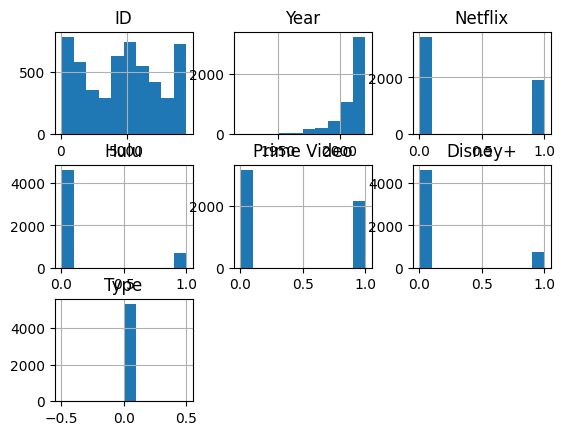

In [18]:
movies_df.hist()

In [19]:
movies_df.groupby("Year")["ID"].count()

Year
1919      1
1928      1
1930      1
1931      1
1932      2
       ... 
2017    406
2018    471
2019    463
2020    426
2021    164
Name: ID, Length: 92, dtype: int64

In [25]:
print(movies_df.duplicated().sum())

0


In [26]:
platform_counts = {}
platform_columns = ["Netflix", "Hulu", "Prime Video", "Disney+"]
for platform in platform_columns:
    platform_counts[platform] = movies_df[platform].sum()
platform_counts

{'Netflix': 1898, 'Hulu': 718, 'Prime Video': 2165, 'Disney+': 725}

In [28]:
rating_counts = {}
ratings = ["13+", "16+", "18+", "7+", "all"]
for rating in ratings:
    rating_counts[rating] = movies_df[movies_df["Age"] == rating]["Age"].count()
rating_counts

{'13+': 998, '16+': 276, '18+': 2276, '7+': 1090, 'all': 698}

<BarContainer object of 5 artists>

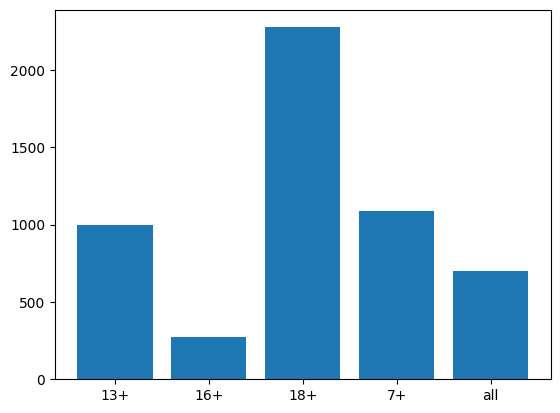

In [35]:
plt.bar(x=rating_counts.keys(), height=rating_counts.values())